In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Load the merged dataset
merged_df = pd.read_csv("key_pattern.csv")

# Separate features and target
X = merged_df.drop(columns=['User'])  # Features
y = merged_df['User']  # Target

In [2]:
print("Data Frame dimensions:", merged_df.shape)
print("X_train dimensions:", X.shape)
print("y_train dimensions:", y.shape)

Data Frame dimensions: (2430, 26)
X_train dimensions: (2430, 25)
y_train dimensions: (2430,)


In [3]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [4]:
from sklearn.utils import shuffle

# Shuffle the training and test sets
X_train, y_train = shuffle(X_train, y_train, random_state=42)
X_test, y_test = shuffle(X_test, y_test, random_state=42)

In [5]:
# Print dimensions of the datasets
print("X_train dimensions:", X_train.shape)
print("y_train dimensions:", y_train.shape)
print("X_test dimensions:", X_test.shape)
print("y_test dimensions:", y_test.shape)

X_train dimensions: (1701, 25)
y_train dimensions: (1701,)
X_test dimensions: (729, 25)
y_test dimensions: (729,)


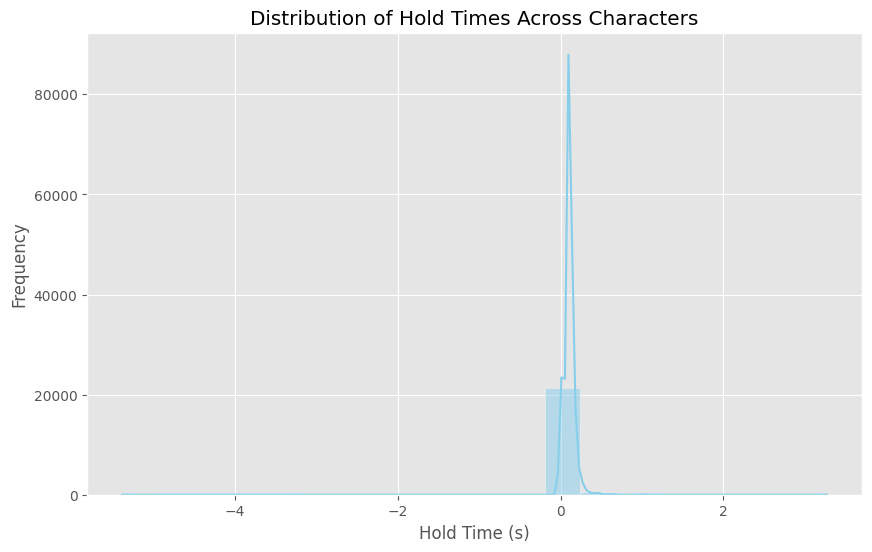

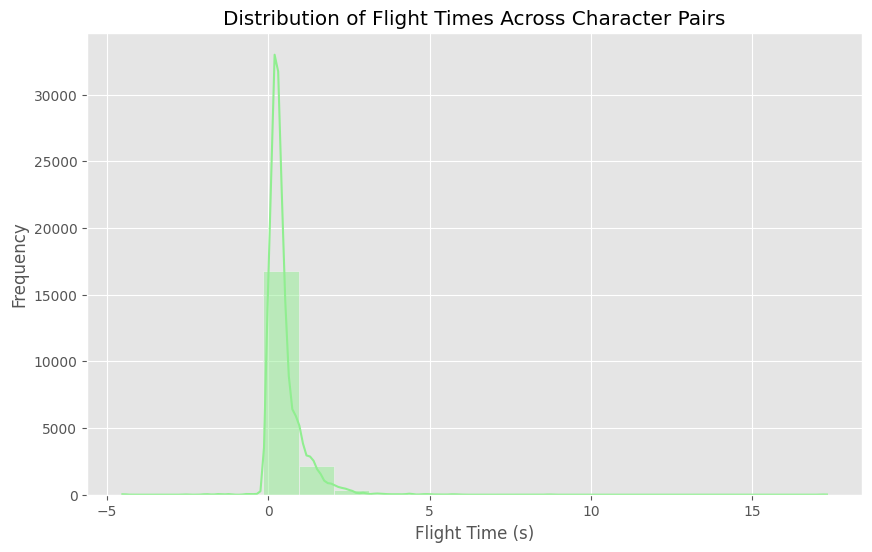

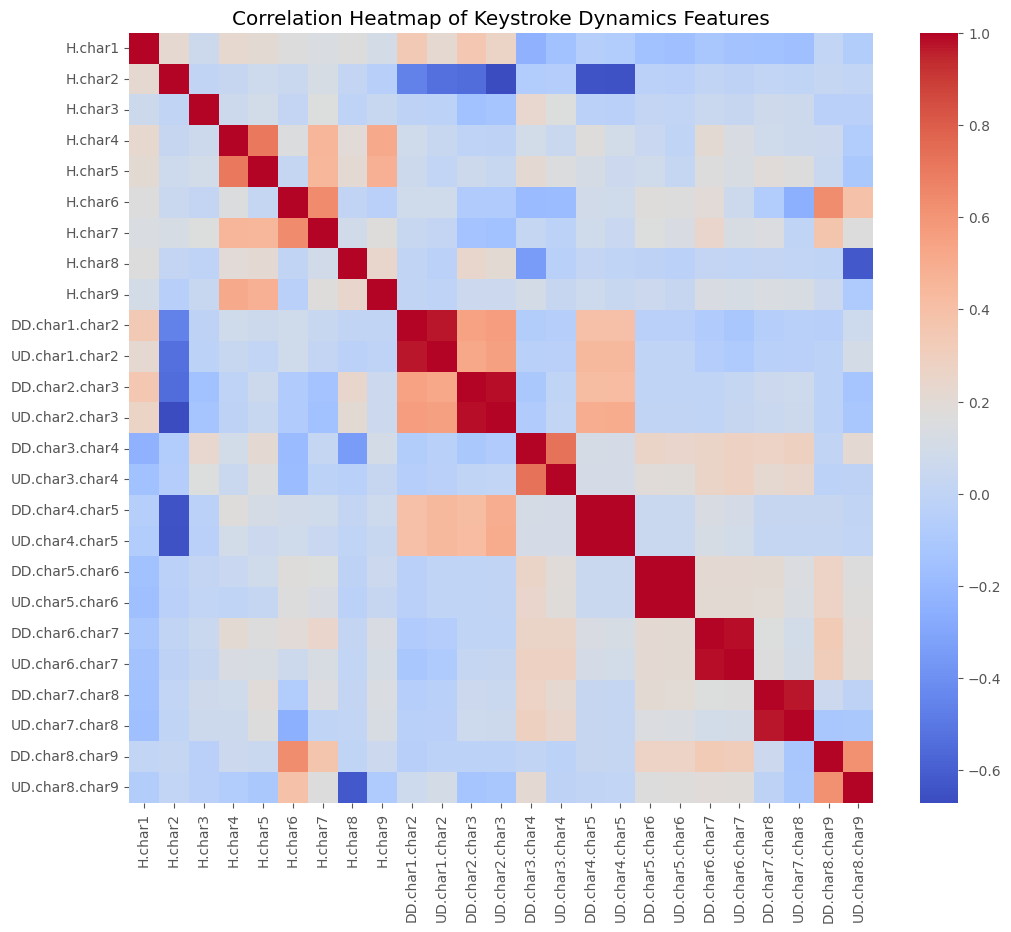

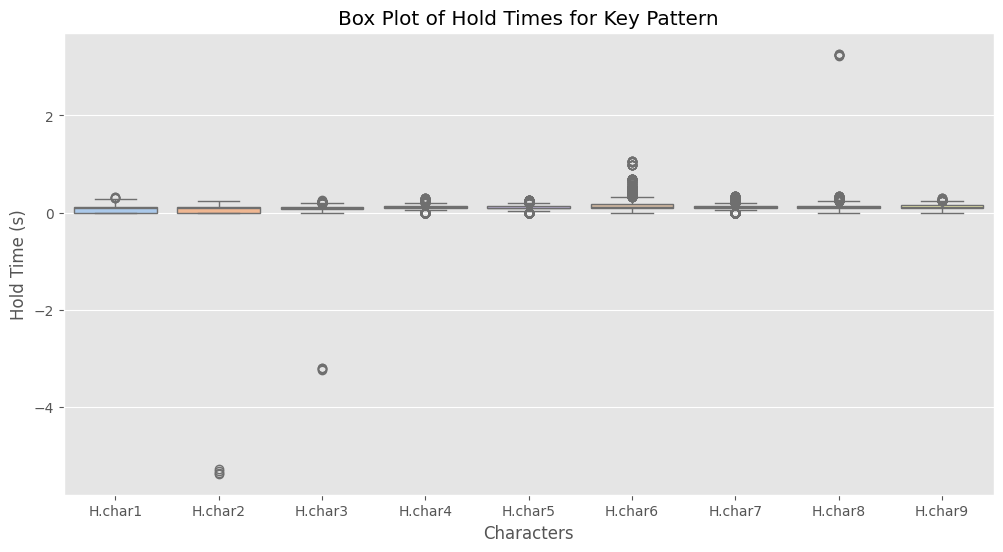

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the visualization styles
plt.style.use('ggplot')

# 1. Distribution of Hold Times in keystroke_dynamics.csv
hold_times = merged_df.filter(like='H.char')
hold_times_melted = hold_times.melt(var_name='Character', value_name='Hold Time')

plt.figure(figsize=(10, 6))
sns.histplot(data=hold_times_melted, x='Hold Time', kde=True, bins=20, color='skyblue')
plt.title('Distribution of Hold Times Across Characters')
plt.xlabel('Hold Time (s)')
plt.ylabel('Frequency')
plt.show()

# 2. Flight Time Comparison in keystroke_dynamics.csv
flight_times = merged_df.filter(like='DD.char')
flight_times_melted = flight_times.melt(var_name='Character Pair', value_name='Flight Time')

plt.figure(figsize=(10, 6))
sns.histplot(data=flight_times_melted, x='Flight Time', kde=True, bins=20, color='lightgreen')
plt.title('Distribution of Flight Times Across Character Pairs')
plt.xlabel('Flight Time (s)')
plt.ylabel('Frequency')
plt.show()

# 3. Heatmap of Correlations Between Keystroke Metrics
keystroke_corr = merged_df.iloc[:, 1:].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(keystroke_corr, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Keystroke Dynamics Features')
plt.show()

# 4. Box Plot of Key Patterns (for key_pattern.csv)
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_df.filter(like='H.char'), palette='pastel')
plt.title('Box Plot of Hold Times for Key Pattern')
plt.xlabel('Characters')
plt.ylabel('Hold Time (s)')
plt.show()


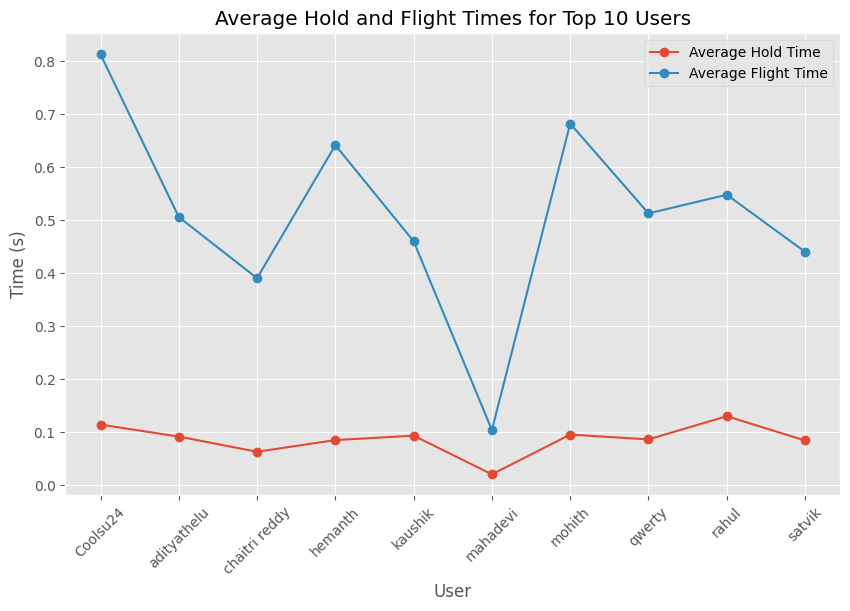

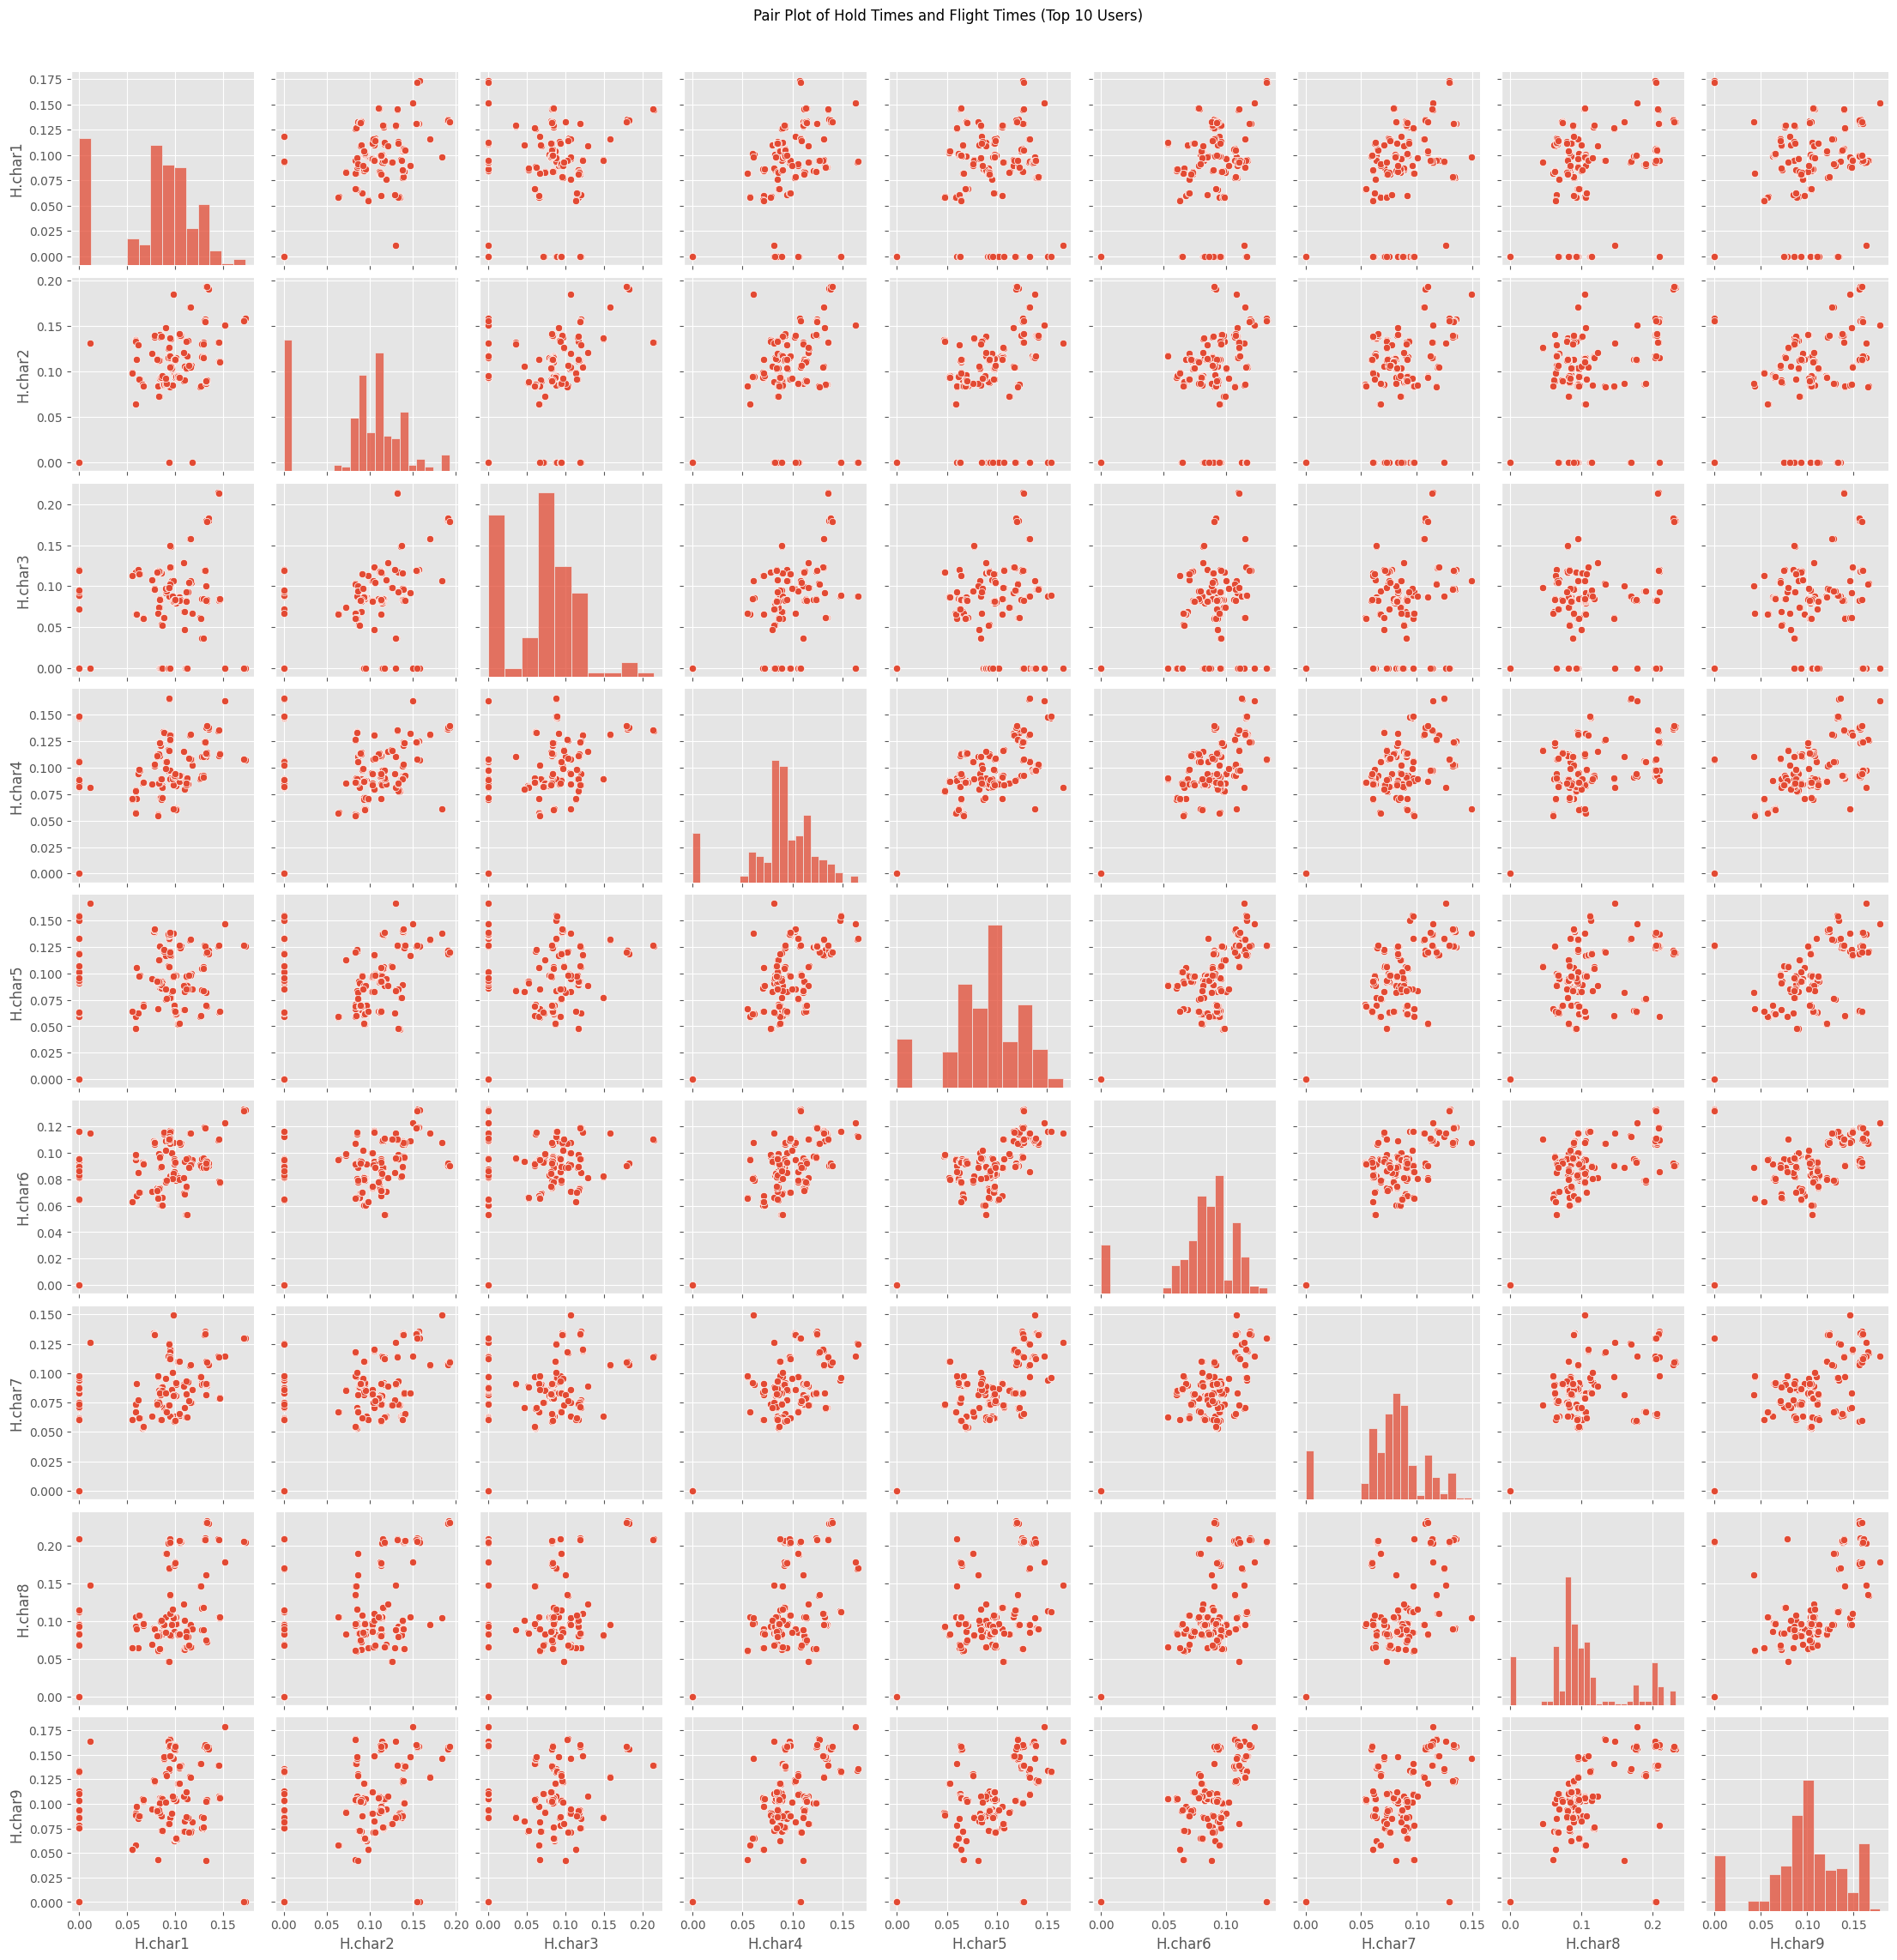

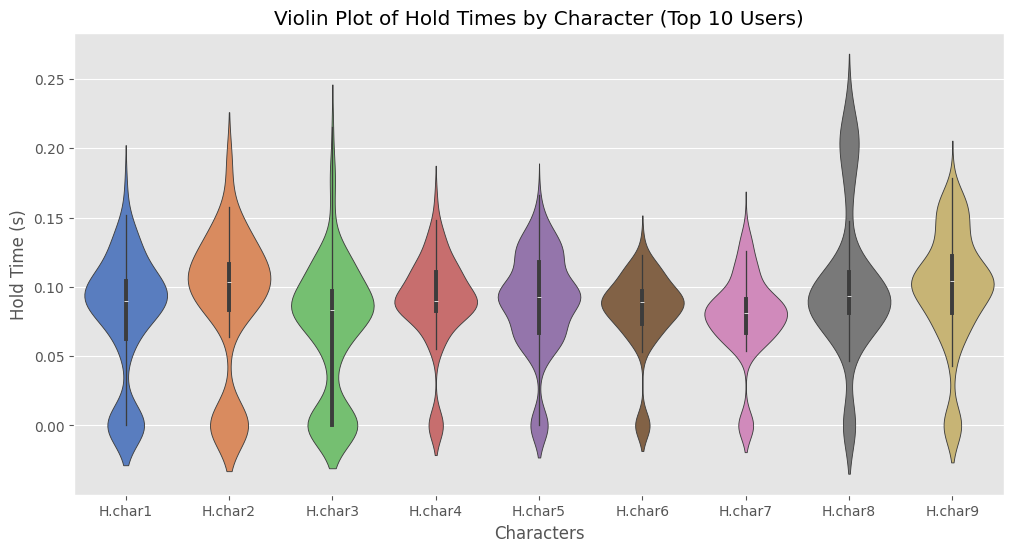

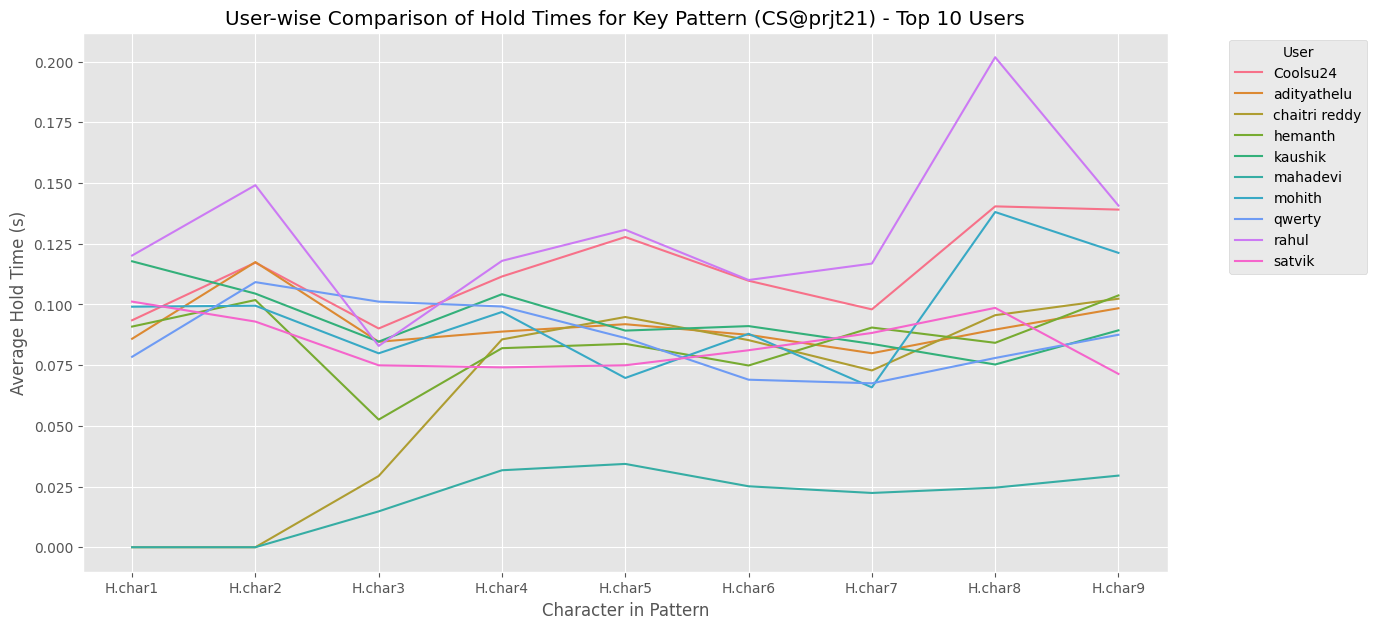

In [7]:
# Filter data to include only the first 10 unique users
top_10_users = merged_df['User'].unique()[:10]
keystroke_dynamics_top10 = merged_df[merged_df['User'].isin(top_10_users)]
key_pattern_top10 = merged_df[merged_df['User'].isin(top_10_users)]

# Recompute average hold and flight times for the top 10 users
avg_hold_times_top10 = keystroke_dynamics_top10.groupby('User').mean().filter(like='H.char').mean(axis=1)
avg_flight_times_top10 = keystroke_dynamics_top10.groupby('User').mean().filter(like='DD.char').mean(axis=1)

# 1. Line Plot for Average Hold and Flight Times by Top 10 Users
plt.figure(figsize=(10, 6))
plt.plot(avg_hold_times_top10.index, avg_hold_times_top10, marker='o', label='Average Hold Time')
plt.plot(avg_flight_times_top10.index, avg_flight_times_top10, marker='o', label='Average Flight Time')
plt.title('Average Hold and Flight Times for Top 10 Users')
plt.xlabel('User')
plt.ylabel('Time (s)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# 2. Pair Plot of Hold and Flight Times for Top 10 Users
sns.pairplot(keystroke_dynamics_top10.iloc[:, 1:10])  # Pairplot on a subset of columns for visualization clarity
plt.suptitle('Pair Plot of Hold Times and Flight Times (Top 10 Users)', y=1.02)
plt.show()

# 3. Violin Plot for Hold Times by Character for Top 10 Users
hold_times_top10 = keystroke_dynamics_top10.filter(like='H.char')
plt.figure(figsize=(12, 6))
sns.violinplot(data=hold_times_top10, palette='muted')
plt.title('Violin Plot of Hold Times by Character (Top 10 Users)')
plt.xlabel('Characters')
plt.ylabel('Hold Time (s)')
plt.show()

# 4. User-wise Comparison of Key Patterns for Top 10 Users
key_pattern_avg_top10 = key_pattern_top10.groupby('User').mean().filter(like='H.char')
plt.figure(figsize=(14, 7))
sns.lineplot(data=key_pattern_avg_top10.T, dashes=False)
plt.title('User-wise Comparison of Hold Times for Key Pattern (CS@prjt21) - Top 10 Users')
plt.xlabel('Character in Pattern')
plt.ylabel('Average Hold Time (s)')
plt.legend(title='User', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


## Random Forest

In [8]:
# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [9]:
# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_confusion = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_confusion = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

In [10]:
# Print training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")
print("Confusion Matrix:\n", train_confusion)
print("Classification Report:\n", train_classification_report)

Training Metrics:
Accuracy: 0.9712
Precision: 0.9857
Recall: 0.9712
F1-Score: 0.9728
Confusion Matrix:
 [[21  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
                 precision    recall  f1-score   support

      ABHISHEK       1.00      1.00      1.00        21
       Aaru@65       1.00      1.00      1.00        21
          Abhi       1.00      1.00      1.00        21
      Coolsu24       1.00      1.00      1.00        21
        Deepti       1.00      1.00      1.00        21
       Hiranya       1.00      1.00      1.00        21
           Huy       1.00      1.00      1.00        21
        Mingyu       1.00      1.00      1.00        21
      Niharika       1.00      1.00      1.00        21
        Nikhil       1.00      1.00      1.00        21
         Rohan       1.00      1.00      1.00        21
        Rutvik       1.00      1.00      1.

In [11]:
# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print("Confusion Matrix:\n", test_confusion)
print("Classification Report:\n", test_classification_report)


Test Metrics:
Accuracy: 0.9287
Precision: 0.9460
Recall: 0.9287
F1-Score: 0.9270
Confusion Matrix:
 [[9 0 0 ... 0 0 0]
 [0 9 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 0 9 0]
 [0 0 0 ... 0 0 9]]
Classification Report:
                 precision    recall  f1-score   support

      ABHISHEK       1.00      1.00      1.00         9
       Aaru@65       0.75      1.00      0.86         9
          Abhi       1.00      1.00      1.00         9
      Coolsu24       1.00      1.00      1.00         9
        Deepti       1.00      0.89      0.94         9
       Hiranya       1.00      1.00      1.00         9
           Huy       1.00      1.00      1.00         9
        Mingyu       1.00      1.00      1.00         9
      Niharika       1.00      1.00      1.00         9
        Nikhil       1.00      1.00      1.00         9
         Rohan       1.00      1.00      1.00         9
        Rutvik       1.00      1.00      1.00         9
      Shridhar       1.00 

import joblib

Save the model 
joblib.dump(rf_model, 'rf_modeldata.joblib')

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import shuffle
import joblib

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           scoring='accuracy', 
                           n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_test_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Calculate metrics for training set
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')
train_confusion = confusion_matrix(y_train, y_train_pred)
train_classification_report = classification_report(y_train, y_train_pred)

# Calculate metrics for test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')
test_confusion = confusion_matrix(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
295 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base

In [13]:
# Print training metrics
print("Training Metrics:")
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Precision: {train_precision:.4f}")
print(f"Recall: {train_recall:.4f}")
print(f"F1-Score: {train_f1:.4f}")
print("Confusion Matrix:\n", train_confusion)
print("Classification Report:\n", train_classification_report)

Training Metrics:
Accuracy: 0.9694
Precision: 0.9840
Recall: 0.9694
F1-Score: 0.9711
Confusion Matrix:
 [[21  0  0 ...  0  0  0]
 [ 0 21  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
                 precision    recall  f1-score   support

      ABHISHEK       1.00      1.00      1.00        21
       Aaru@65       1.00      1.00      1.00        21
          Abhi       1.00      1.00      1.00        21
      Coolsu24       1.00      1.00      1.00        21
        Deepti       1.00      1.00      1.00        21
       Hiranya       1.00      1.00      1.00        21
           Huy       1.00      1.00      1.00        21
        Mingyu       1.00      1.00      1.00        21
      Niharika       1.00      1.00      1.00        21
        Nikhil       1.00      1.00      1.00        21
         Rohan       1.00      1.00      1.00        21
        Rutvik       1.00      1.00      1.

In [14]:
# Print test metrics
print("\nTest Metrics:")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print("Confusion Matrix:\n", test_confusion)
print("Classification Report:\n", test_classification_report)


Test Metrics:
Accuracy: 0.9342
Precision: 0.9508
Recall: 0.9342
F1-Score: 0.9329
Confusion Matrix:
 [[9 0 0 ... 0 0 0]
 [0 9 0 ... 0 0 0]
 [0 0 9 ... 0 0 0]
 ...
 [0 0 0 ... 9 0 0]
 [0 0 0 ... 0 9 0]
 [0 0 0 ... 0 0 9]]
Classification Report:
                 precision    recall  f1-score   support

      ABHISHEK       1.00      1.00      1.00         9
       Aaru@65       0.82      1.00      0.90         9
          Abhi       1.00      1.00      1.00         9
      Coolsu24       1.00      1.00      1.00         9
        Deepti       1.00      0.89      0.94         9
       Hiranya       1.00      1.00      1.00         9
           Huy       1.00      1.00      1.00         9
        Mingyu       1.00      1.00      1.00         9
      Niharika       1.00      1.00      1.00         9
        Nikhil       1.00      1.00      1.00         9
         Rohan       1.00      1.00      1.00         9
        Rutvik       1.00      1.00      1.00         9
      Shridhar       1.00 

## KNN

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
import joblib

# Define the parameter grid for grid search
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15,17,19,21,25]}

# Initialize the KNN model
knn = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Save the best model
best_knn = grid_search.best_estimator_
joblib.dump(best_knn, 'knn_best.joblib')

# Make predictions using the best model
y_train_pred_best = best_knn.predict(X_train)
y_test_pred_best = best_knn.predict(X_test)

# Calculate metrics for training set (best model)
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
train_precision_best = precision_score(y_train, y_train_pred_best, average='macro')
train_recall_best = recall_score(y_train, y_train_pred_best, average='macro')
train_f1_best = f1_score(y_train, y_train_pred_best, average='macro')
# train_confusion_best = confusion_matrix(y_train, y_train_pred_best)
train_classification_report_best = classification_report(y_train, y_train_pred_best)

# Calculate metrics for test set (best model)
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
test_precision_best = precision_score(y_test, y_test_pred_best, average='macro')
test_recall_best = recall_score(y_test, y_test_pred_best, average='macro')
test_f1_best = f1_score(y_test, y_test_pred_best, average='macro')
# test_confusion_best = confusion_matrix(y_test, y_test_pred_best)
test_classification_report_best = classification_report(y_test, y_test_pred_best)

# Print best parameters and metrics
print("Best Parameters:", grid_search.best_params_)
print("\nTraining Metrics (Best Model):")
print(f"Accuracy: {train_accuracy_best:.4f}")
print(f"Precision: {train_precision_best:.4f}")
print(f"Recall: {train_recall_best:.4f}")
print(f"F1-Score: {train_f1_best:.4f}")
# print("Confusion Matrix:\n", train_confusion_best)
print("Classification Report:\n", train_classification_report_best)

print("\nTest Metrics (Best Model):")
print(f"Accuracy: {test_accuracy_best:.4f}")
print(f"Precision: {test_precision_best:.4f}")
print(f"Recall: {test_recall_best:.4f}")
print(f"F1-Score: {test_f1_best:.4f}")
# print("Confusion Matrix:\n", test_confusion_best)
print("Classification Report:\n", test_classification_report_best)


Best Parameters: {'n_neighbors': 3}

Training Metrics (Best Model):
Accuracy: 0.9048
Precision: 0.9216
Recall: 0.9048
F1-Score: 0.9054
Classification Report:
                 precision    recall  f1-score   support

      ABHISHEK       0.91      0.95      0.93        21
       Aaru@65       0.77      0.95      0.85        21
          Abhi       0.95      0.95      0.95        21
      Coolsu24       0.95      0.90      0.93        21
        Deepti       0.95      1.00      0.98        21
       Hiranya       0.79      0.90      0.84        21
           Huy       1.00      1.00      1.00        21
        Mingyu       0.95      0.95      0.95        21
      Niharika       0.88      1.00      0.93        21
        Nikhil       1.00      1.00      1.00        21
         Rohan       1.00      0.95      0.98        21
        Rutvik       1.00      1.00      1.00        21
      Shridhar       1.00      1.00      1.00        21
        Sunday       0.83      0.90      0.86        21


## SVM

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import joblib

# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

# Initialize the SVM model
svm = SVC()

# Perform grid search with cross-validation
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_svm.fit(X_train, y_train)

# # Save the best SVM model
best_svm = grid_search_svm.best_estimator_
# joblib.dump(best_svm, 'svm_best.joblib')

# Make predictions using the best SVM model
y_train_pred_best_svm = best_svm.predict(X_train)
y_test_pred_best_svm = best_svm.predict(X_test)

# Calculate metrics for the training set (best SVM model)
train_accuracy_best_svm = accuracy_score(y_train, y_train_pred_best_svm)
train_precision_best_svm = precision_score(y_train, y_train_pred_best_svm, average='macro')
train_recall_best_svm = recall_score(y_train, y_train_pred_best_svm, average='macro')
train_f1_best_svm = f1_score(y_train, y_train_pred_best_svm, average='macro')
train_confusion_best_svm = confusion_matrix(y_train, y_train_pred_best_svm)
train_classification_report_best_svm = classification_report(y_train, y_train_pred_best_svm)

# Calculate metrics for the test set (best SVM model)
test_accuracy_best_svm = accuracy_score(y_test, y_test_pred_best_svm)
test_precision_best_svm = precision_score(y_test, y_test_pred_best_svm, average='macro')
test_recall_best_svm = recall_score(y_test, y_test_pred_best_svm, average='macro')
test_f1_best_svm = f1_score(y_test, y_test_pred_best_svm, average='macro')
test_confusion_best_svm = confusion_matrix(y_test, y_test_pred_best_svm)
test_classification_report_best_svm = classification_report(y_test, y_test_pred_best_svm)

# Print best parameters and metrics
print("Best Parameters for SVM:", grid_search_svm.best_params_)
print("\nTraining Metrics (Best SVM Model):")
print(f"Accuracy: {train_accuracy_best_svm:.4f}")
print(f"Precision: {train_precision_best_svm:.4f}")
print(f"Recall: {train_recall_best_svm:.4f}")
print(f"F1-Score: {train_f1_best_svm:.4f}")
print("Confusion Matrix:\n", train_confusion_best_svm)
print("Classification Report:\n", train_classification_report_best_svm)

print("\nTest Metrics (Best SVM Model):")
print(f"Accuracy: {test_accuracy_best_svm:.4f}")
print(f"Precision: {test_precision_best_svm:.4f}")
print(f"Recall: {test_recall_best_svm:.4f}")
print(f"F1-Score: {test_f1_best_svm:.4f}")
print("Confusion Matrix:\n", test_confusion_best_svm)
print("Classification Report:\n", test_classification_report_best_svm)


Best Parameters for SVM: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}

Training Metrics (Best SVM Model):
Accuracy: 0.9477
Precision: 0.9623
Recall: 0.9477
F1-Score: 0.9488
Confusion Matrix:
 [[21  0  0 ...  0  0  0]
 [ 0 20  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 21  0  0]
 [ 0  0  0 ...  0 21  0]
 [ 0  0  0 ...  0  0 21]]
Classification Report:
                 precision    recall  f1-score   support

      ABHISHEK       1.00      1.00      1.00        21
       Aaru@65       1.00      0.95      0.98        21
          Abhi       1.00      1.00      1.00        21
      Coolsu24       1.00      1.00      1.00        21
        Deepti       1.00      1.00      1.00        21
       Hiranya       1.00      1.00      1.00        21
           Huy       1.00      1.00      1.00        21
        Mingyu       1.00      1.00      1.00        21
      Niharika       1.00      1.00      1.00        21
        Nikhil       1.00      1.00      1.00        21
       

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

# Encode labels as integers if they are not already
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']  # 'liblinear' is good for small datasets, 'saga' can handle large datasets
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform grid search with cross-validation
grid_search_log_reg = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

# Get the best model from grid search
best_log_reg = grid_search_log_reg.best_estimator_

# Make predictions on the training set using the best model
y_train_pred_best = best_log_reg.predict(X_train)

# Make predictions on the test set using the best model
y_test_pred_best = best_log_reg.predict(X_test)

# Calculate metrics for the training set
train_accuracy_best = accuracy_score(y_train, y_train_pred_best)
train_precision_best = precision_score(y_train, y_train_pred_best, average='macro')
train_recall_best = recall_score(y_train, y_train_pred_best, average='macro')
train_f1_best = f1_score(y_train, y_train_pred_best, average='macro')
train_confusion_best = confusion_matrix(y_train, y_train_pred_best)
train_classification_report_best = classification_report(y_train, y_train_pred_best)

# Calculate metrics for the test set
test_accuracy_best = accuracy_score(y_test, y_test_pred_best)
test_precision_best = precision_score(y_test, y_test_pred_best, average='macro')
test_recall_best = recall_score(y_test, y_test_pred_best, average='macro')
test_f1_best = f1_score(y_test, y_test_pred_best, average='macro')
test_confusion_best = confusion_matrix(y_test, y_test_pred_best)
test_classification_report_best = classification_report(y_test, y_test_pred_best)

# Print best parameters and metrics
print("Best Parameters:", grid_search_log_reg.best_params_)
print("\nTraining Metrics (Best Model):")
print(f"Accuracy: {train_accuracy_best:.4f}")
print(f"Precision: {train_precision_best:.4f}")
print(f"Recall: {train_recall_best:.4f}")
print(f"F1-Score: {train_f1_best:.4f}")
print("Confusion Matrix:\n", train_confusion_best)
print("Classification Report:\n", train_classification_report_best)

print("\nTest Metrics (Best Model):")
print(f"Accuracy: {test_accuracy_best:.4f}")
print(f"Precision: {test_precision_best:.4f}")
print(f"Recall: {test_recall_best:.4f}")
print(f"F1-Score: {test_f1_best:.4f}")
print("Confusion Matrix:\n", test_confusion_best)
print("Classification Report:\n", test_classification_report_best)


Best Parameters: {'C': 100, 'solver': 'liblinear'}

Training Metrics (Best Model):
Accuracy: 0.8179
Precision: 0.8356
Recall: 0.8164
F1-Score: 0.8096
Confusion Matrix:
 [[26  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 24 ...  0  0  0]
 ...
 [ 0  0  0 ... 25  0  0]
 [ 0  0  0 ...  0 18  0]
 [ 0  2  0 ...  0  0 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.96      0.75        27
           1       0.68      0.92      0.78        25
           2       1.00      1.00      1.00        24
           3       0.79      0.76      0.78        25
           4       1.00      0.95      0.98        21
           5       0.96      0.96      0.96        26
           6       1.00      1.00      1.00        24
           7       0.95      0.95      0.95        22
           8       1.00      1.00      1.00        27
           9       1.00      1.00      1.00        24
          10       0.90      1.00      0.95        26
  

C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\satvi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, ms